In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


[*********************100%%**********************]  1 of 1 completed
/var/folders/3v/824h61h90xl37fhnnb4sr1hc0000gn/T/ipykernel_60900/1140715095.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_price = oil_prices[-1]


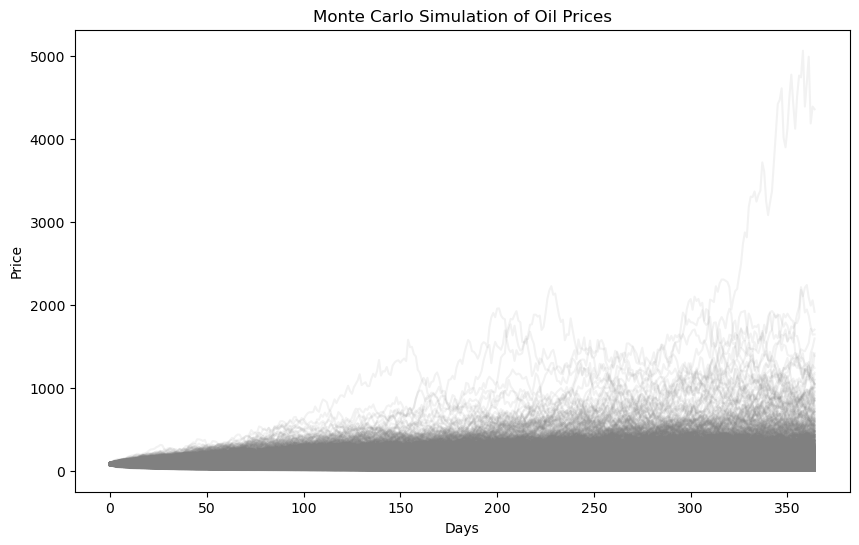

Mean end price: 59.51069533677378
Median end price: 28.466166647774106
5th percentile: 3.5998813998856733
25th percentile: 12.477804393778184
50th percentile: 28.466166647774106
75th percentile: 63.98848736594046
95th percentile: 212.77566098338093


In [3]:
# Function to fetch historical data from Yahoo Finance
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# Fetch historical oil price data (e.g., WTI Crude Oil)
ticker = 'CL=F'  # Yahoo Finance ticker for WTI Crude Oil
start_date = '2010-01-01'
end_date = '2023-01-01'
oil_prices = fetch_data(ticker, start_date, end_date)

# Calculate daily returns
oil_prices = oil_prices.dropna()
returns = oil_prices.pct_change().dropna()

# Statistical metrics
mean_return = returns.mean()
std_dev_return = returns.std()

# Monte Carlo Simulation parameters
num_simulations = 10000
num_days = 365
starting_price = oil_prices[-1]

# Monte Carlo Simulation
simulated_prices = np.zeros((num_simulations, num_days))
for i in range(num_simulations):
    daily_returns = np.random.normal(mean_return, std_dev_return, num_days)
    price_series = starting_price * (1 + daily_returns).cumprod()
    simulated_prices[i, :] = price_series

# Plotting the simulation results
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices.T, color='gray', alpha=0.1)
plt.title('Monte Carlo Simulation of Oil Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

# Analyzing the results
simulated_end_prices = simulated_prices[:, -1]
mean_end_price = np.mean(simulated_end_prices)
median_end_price = np.median(simulated_end_prices)
quantiles = np.percentile(simulated_end_prices, [5, 25, 50, 75, 95])

print(f'Mean end price: {mean_end_price}')
print(f'Median end price: {median_end_price}')
print(f'5th percentile: {quantiles[0]}')
print(f'25th percentile: {quantiles[1]}')
print(f'50th percentile: {quantiles[2]}')
print(f'75th percentile: {quantiles[3]}')
print(f'95th percentile: {quantiles[4]}')
